In [1]:
# Import packages
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# Set enviroment
env = UnityEnvironment(file_name="/media/riley/Work/PersonalProjects/AI/Deep_Reinforcement_Learning/Project1/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


# DQN

In [4]:
#from dqn_agent import Agent
from agent import DQNPRBAgent
from agent import DQNAgent

agent = DQNAgent(state_size=37, action_size=4, seed=0, use_dueling=True, use_double=True)

cuda:0


Episode 100	Average Score: 0.67
Episode 200	Average Score: 3.34
Episode 300	Average Score: 6.08
Episode 400	Average Score: 8.28
Episode 500	Average Score: 12.38
Episode 539	Average Score: 13.04
Environment solved in 439 episodes!	Average Score: 13.04
	Model Saved
Episode 543	Average Score: 13.09	Model Saved
Episode 544	Average Score: 13.16	Model Saved
Episode 545	Average Score: 13.25	Model Saved
Episode 547	Average Score: 13.34	Model Saved
Episode 548	Average Score: 13.36	Model Saved
Episode 552	Average Score: 13.43	Model Saved
Episode 553	Average Score: 13.45	Model Saved
Episode 554	Average Score: 13.47	Model Saved
Episode 555	Average Score: 13.49	Model Saved
Episode 559	Average Score: 13.52	Model Saved
Episode 560	Average Score: 13.54	Model Saved
Episode 561	Average Score: 13.57	Model Saved
Episode 564	Average Score: 13.57	Model Saved
Episode 570	Average Score: 13.63	Model Saved
Episode 571	Average Score: 13.69	Model Saved
Episode 572	Average Score: 13.71	Model Saved
Episode 574	Aver

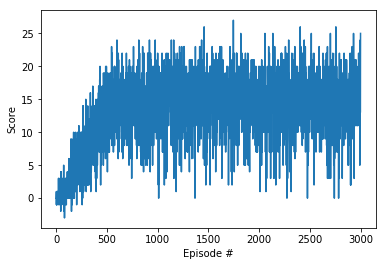

In [5]:
def dqn(n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Train the Deep Q network."""
    highest_score = 0
    scores = []
    scores_windows = deque(maxlen=100)
    eps = eps_start
    solved = False
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        while True:
            action = agent.act(state, eps)
            # send the action to the environment
            env_info = env.step(action)[brain_name]
            # get the next state
            next_state = env_info.vector_observations[0]
            # get the reward
            reward = env_info.rewards[0]
            # see if episode has finished
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            # update the score
            score += reward
            # roll over the state to next time step
            state = next_state
            
            if done:
                break
        scores_windows.append(score)
        scores.append(score)
        eps = max(eps_end, eps * eps_decay)
        if np.mean(scores_windows) > highest_score:
            highest_score = np.mean(scores_windows)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_windows)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_windows)))
        if np.mean(scores_windows)>=13.0 and not solved:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_windows)))
            solved = True
        if np.mean(scores_windows)>=13.0 and solved:
            if np.mean(scores_windows) == highest_score:
                print('\tModel Saved')
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores[:2000])), scores[:2000])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Load and observe the trained agent

In [22]:
import time
checkpoint = torch.load('checkpoint.pth')
agent = DQNAgent(state_size=37, action_size=4, seed=0, use_dueling=True, use_double=True)
agent.qnetwork_local.load_state_dict(checkpoint)


env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
score = 0
while True:
    time.sleep(0.025)
    action = agent.act(state, 0)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    if done:
        break
    
print("Score: {}".format(score))

Score: 21.0


In [ ]:
env.close()